#Introducción al aprendizaje computacional (Machine Learning):
## Utilizando la librería scikitlearn

Este taller guiado tiene como objetivo hacer un primer acercamiento práctico acerca del aprendizaje computacional  con Python. Lo invito a interactuar y experimentar libremente con esta herramienta de aprendizaje. En el menú superior de click al botón copiar en Drive para crear una copia editable de este Notebook.

En este taller guiado veremos como:

* crear particiones de entrenamiento y prueba
* entrenar modelos para clasificación usando 2 algoritmos de Machine Learning
* evaluar el desempeño de modelos de clasificación (primera parte)

#1. Importar librería sklearn
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" alt = "Encabezado" width = "30%">  </img>

In [1]:
!pip install -U scikit-learn
import sklearn
print(sklearn.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 86.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
1.5.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Scikit-learn', sklearn.__version__)

Python 3.10.12
NumPy 1.25.2
Pandas 2.0.3
Matplotlib 3.7.1
Scikit-learn 1.5.0


## **2. Cargar datos**
Para este taller vamos a cargar el dataset Iris, un conjunto de datos que ya conocemos y hemos trabajo previamente. Para mayor información acerca del dataset iris consulte.

Para mayor información de los datasets disponibles en sklearn consulte.

https://scikit-learn.org/stable/datasets/toy_dataset.html

El dataset Iris está conformado por 150 observaciones. En este dataset hay 3 tipos de flores identificadas en la variable Species. Para cada observación se tomaron 4 mediciones, ancho y largo del pétalo y ancho y largo del sépalo. A continuación encontrará un breve resumen estadístico.

In [3]:
# De esta manera podemos cargar las variables predictoras X y
#la variable a predecir y como arreglos de numpy

from sklearn import datasets


X, y = datasets.load_iris(return_X_y=True)

print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
#Carga del archivo del repositorio Github
#El archivo a cargar no tiene nombre de columnas
#para poner los nombres de las columnas se puede hacer de dos manera:
# Primera forma:
iris= pd.read_csv('https://raw.githubusercontent.com/ngarciad/UPC/main/iris-Sinnames.data',
                  header=None)

#Según la documentación los nombres de columnas se almacenan en la siguiente lista
columnas= ['sepal-lenght','sepal-width','petal-lenght','petal-width','Species']

iris.columns=columnas

In [ ]:
iris.info()

In [6]:
#Segunda forma para poner los nombres de las columnas
path= "https://raw.githubusercontent.com/ngarciad/UPC/main/iris-Sinnames.data"

columnas= ['sepal-lenght','sepal-width','petal-lenght','petal-width','Species']

iris2=pd.read_csv(path, names= columnas)

In [ ]:
iris2.info()

In [ ]:
iris2.shape

In [8]:
#Muestra la descripción estadística del DataFrame y
#se agrupa por la variable categórica para conocer la frecuencia
#de cada uno de sus valores

print(iris.describe(),'\n')

print(iris.groupby('Species').size())

       sepal-lenght  sepal-width  petal-lenght  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000 

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


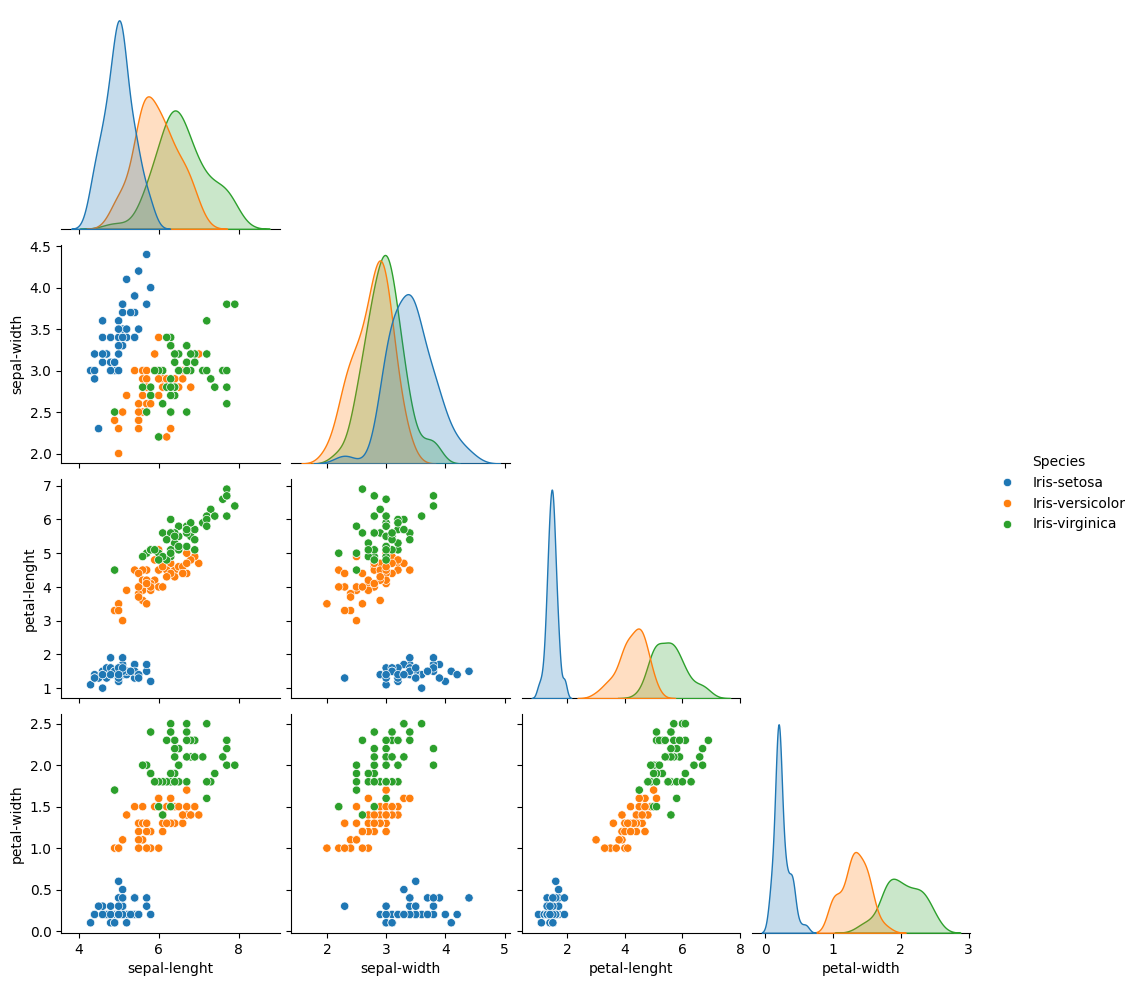

In [9]:
#El pairplot hace un diagrama de dispersión entre las diferentes
#características, ello permite identificar algunas características
#que identifican la specie

sb.pairplot(data= iris,
            hue= 'Species',
            corner= True)

## **3. Partición del dataset en entrenamiento y prueba**

Con el objetivo de crear un modelo capaz de generalizar se procede a dividir los datos en dos subconjuntos. El conjunto de **entrenamiento** y **prueba**.

* El algoritmo aprenderá a partir de los datos de **entrenamiento**.
* Los datos de prueba serán usados para evaluar el desempeño del modelo, ya que son datos desconocidos para el algoritmo.

Usando una función de scikitlearn llamada train_test_split haremos un muestreo aleatorio para crear los dos subconjuntos en una sola linea de código.

En este segundo ejercicio crea un modelo de clasificación, el objetivo es predecir la especie a partir de mediciones del pétalo y sépalo . Para lograr esto, le daremos inicialmente al algoritmo información acerca de las medidas de las flores y de la especie a la cual pertenecen, durante el aprendizaje el algoritmo revelerá patrones y tendencias en los datos que le permitan llegar a la etiqueta de salida. Y luego usaremos datos desconocidos para el modelo - datos de prueba - para evaluar el desempeño del modelo.

**Nota:** Tenga presente que este es un ejercicio de aprendizaje supervisado ya que tenemos datos etiquetados, la columna Species es nuestra etiqueta.

| Variable | Uso|
| ----------- | ----------- |
| Largo del sépalo (sepal-lenght) |Predictora  |
| Ancho del sépalo (sepal-width) |Predictora   |
| Largo del petalo (petal-lenght) |Predictora  |
| Ancho del petalo (petal-width) |Predictora   |
| Especie (Species)| Objetivo |

In [10]:
X = iris.drop(columns = ['Species'])
y = iris['Species']

print('Dimensiones de X: {}'.format(X.shape))
print('Dimensiones de y: {}'.format(y.shape))

Dimensiones de X: (150, 4)
Dimensiones de y: (150,)


In [11]:
# Ahora usaremos la función train test split que pertencen al paquete model_selection de sklearn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, #primero pasamos los datos
    test_size = 0.3, # Determinamos la porción de los datos que se usará para probar el modelo, en este caso 30%
    random_state = 4 # Estado aleatorio - Semilla - seed, # reproducibilidad
)

In [12]:
print('Dimensiones de X de entrenamiento: {}'.format(X_train.shape))
print('Dimensiones de y de entrenamiento: {}\n'.format(y_train.shape))

print('Dimensiones de X de prueba: {}'.format(X_test.shape))
print('Dimensiones de y de prueba: {}'.format(y_test.shape))

Dimensiones de X de entrenamiento: (105, 4)
Dimensiones de y de entrenamiento: (105,)

Dimensiones de X de prueba: (45, 4)
Dimensiones de y de prueba: (45,)


#4. Modelamiento
Vamos a crear nuestro primer modelo de clasificación usando  algoritmos de Machine Learning:

1. K-Vecinos más cercanos, conocido por sus siglas en ingles KNN (K-Nearest-Neighbour)
2. Árbol de decisión, conocido por sus siglas en inglés DT (Decision Tree)

##4.1 K-Vecinos más cercanos

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

# Note que importamos el clasificador para resolver un problema de clasificación, cabe destacar que también existe su contraparte de regresión

# Creamos un objeto que va a contener toda la información del modelo, en este caso le pasamos el hiperparametro número de vecinos (n_neighbors)
clf = KNeighborsClassifier(n_neighbors = 1)

# Usando este objeto vamos a hacer el entrenamiento del modelo, para ello usamos el método fit, este se encarga de ajustar el modelo usando los datos de entrenamiento
clf.fit(X_train,y_train)

print('Ya hemos entrenado modelo con el algoritmo de Machine Learning K-Vecinos más Cercanos')
print(type(clf))

Ya hemos entrenado modelo con el algoritmo de Machine Learning K-Vecinos más Cercanos
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>


In [14]:
k_value= np.linspace(1, 45, dtype= 'int')
score_prueba_lista= []
score_entrenamiento_lista= []

for vecinos in k_value:
  clf= KNeighborsClassifier(n_neighbors= vecinos) #el atributo n_neighbors es el k de la presentación
  clf.fit(X_train, y_train)
  score_entrenamiento= clf.score(X_train, y_train)
  score_entrenamiento_lista.append(score_entrenamiento)

  score_prueba= clf.score(X_test, y_test)
  score_prueba_lista.append(score_prueba)


In [ ]:
plt.plot(k_value, score_prueba_lista, color= 'red')
plt.plot(k_value, score_entrenamiento_lista)

In [ ]:
resultados= pd.DataFrame({'k': k_value,
                         'score_prueba': score_prueba_lista,
                         'score_entrenamiento': score_entrenamiento_lista})
resultados.sort_values(by= 'score_prueba', ascending= False)

###4.1.1 Evaluación del desempeño del modelo
Para evaluar el desempeño del módelo usaremos la exactitud tanto en la partición de entrenamiento como en la de prueba, recuerde que tomamos decisiones usando las métricas sobre la partición de prueba.

Para evaluar el desempeño vamos a comparar las etiquetas reales contra las etiquetas predichas por el modelo. Hagamos primero nuestra primera predicción usando el método predict sobre el objeto clf.


In [ ]:
# Medimos las métricas
y_predicted = clf.predict(X_test)
comp = y_test == y_predicted

pd.DataFrame({'Etiqueta real': y_test,'Etiqueta predicha': y_predicted, 'Comparación' : comp })



La exactitud se define como:

$$\text{Exactitud} = \frac{\text{número de ejemplos clasificados correctamente}}{\text{ número total de ejemplos}}$$

Toma valores de 0 y puede ser interpretado como el porcentaje de casos exitosamente clasificados por el modelo, entre mayor sea su valor mejor es el desempeño del modelo. Vamos a calcular la exactitud del modelo con la función accuracy_score que acepta como primer parámetro las etiquetas reales y como segundo parámetro las etiquetas predichas.

In [18]:
from sklearn.metrics import accuracy_score

acc_knn = accuracy_score(y_test, y_predicted)
print('Exactitud en partición de prueba: {:3f}'.format(acc_knn))

y_pred2 = clf.predict(X_train)
acc_knn2 = accuracy_score(y_train, y_pred2)
print('Exactitud en partición de entrenamiento: {:3f}'.format(acc_knn2))

Exactitud en partición de prueba: 0.977778
Exactitud en partición de entrenamiento: 0.933333


##4.2 Árbol de Desición


In [30]:
#Importamos el clasificador para resolver un problema de clasificación,
#cabe destacar que también existe su contraparte de regresión
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Creamos un objeto que va a contener toda la información del modelo
#Hiperparámetros

tree = DecisionTreeClassifier(max_depth= 2, # Define la profundidad máxima del árbol, cuando igual a None no se limita el crecimiento del arbol
                              random_state= 45, # Define la semilla para las variables aleatorias requeridas dentro del algoritmo
                               max_leaf_nodes = 3# Define el criterio usado para medir la calidad, la reducción de la impureza
                              )

# Usando este objeto vamos a hacer el entrenamiento del modelo,
#para ello usamos el método fit, este se encarga de ajustar el modelo usando los datos de entrenamiento
tree.fit(X_train,y_train)

print('¡Ya hemos creado nuestro modelo usando el algoritmo de Machine Learning árbol de decisión!')
print(type(clf))

¡Ya hemos creado nuestro modelo usando el algoritmo de Machine Learning árbol de decisión!
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>


###4.2.1 Evaluación del desempeño del modelo

In [31]:
from sklearn.metrics import accuracy_score

y_pred_tree = tree.predict(X_test)
acc_tree_test = accuracy_score(y_test, y_pred_tree)

print('Exactitud en partición de prueba: {:3f}'.format(acc_tree_test))

y_pred_tree_train = tree.predict(X_train)
acc_tree_train = accuracy_score(y_train, y_pred_tree_train)
print('Exactitud en partición de entrenamiento: {:3f}'.format(acc_tree_train))

Exactitud en partición de prueba: 0.977778
Exactitud en partición de entrenamiento: 0.952381


In [21]:
# Retorna los hiperparámetros usados para entrenar el modelo
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': 3,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 45,
 'splitter': 'best'}

In [22]:
# Retorna la profundidad del árbol
tree.get_depth()

2

In [23]:
# Retorna la importancia de las variables predictoras
#en la predicción de la etiqueta Species

tree.feature_importances_

array([0.        , 0.        , 0.52337698, 0.47662302])

In [24]:
# Retorna el nombre de las variables predictoras importantes

tree.feature_names_in_

array(['sepal-lenght', 'sepal-width', 'petal-lenght', 'petal-width'],
      dtype=object)

In [ ]:
tree.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Text(0, 0.5, 'Importancia relativa')

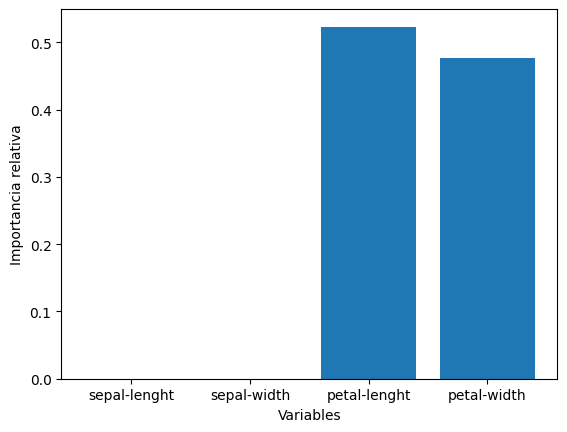

In [25]:
plt.bar(x= tree.feature_names_in_ ,height = tree.feature_importances_)
plt.xlabel('Variables')
plt.ylabel('Importancia relativa')

Esta es una de las grandes utilidades que tiene los Árboles de Decisión: la interpretabilidad de sus resultados

In [26]:
from sklearn.tree import export_graphviz
export_graphviz(tree,
                out_file="tree.dot",
                class_names= tree.classes_,
                feature_names= tree.feature_names_in_,
                impurity=False,
                filled=True
                )

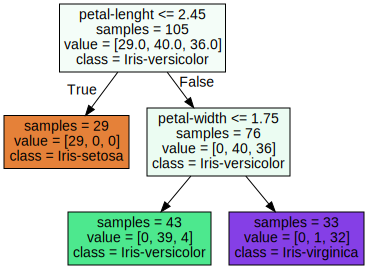

In [27]:
import graphviz

with open("tree.dot") as f:dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [28]:
#Experimentar con los hiperparámetros
#profundidad = [1,2,3,4,5,6,7,8,9,10]

profundidad = range(1,10)
exactitud_prueba = []
exactitud_entrenamiento = []

for i in profundidad:
  tree = DecisionTreeClassifier(random_state = 0, max_depth = i)
  tree.fit(X_train,y_train)

  y_pred = tree.predict(X_test)
  y_pred2 = tree.predict(X_train)

  metrica = accuracy_score(y_test,y_pred)
  metrica2 = accuracy_score(y_train,y_pred2)

  exactitud_prueba.append(metrica)
  exactitud_entrenamiento.append(metrica2)

print(profundidad)
print(exactitud_prueba)
print(exactitud_entrenamiento)

range(1, 10)
[0.6888888888888889, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777]
[0.6571428571428571, 0.9523809523809523, 0.9714285714285714, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


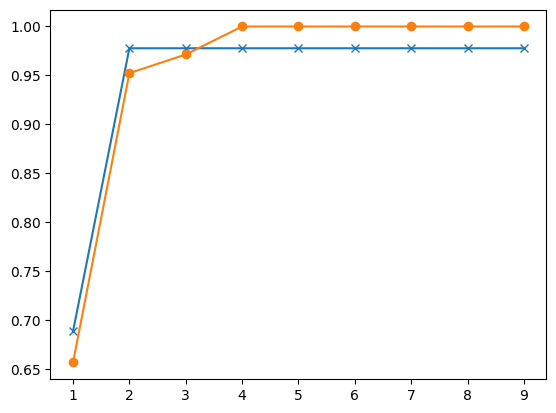

In [29]:
plt.plot(profundidad,exactitud_prueba, marker = 'x')
plt.plot(profundidad,exactitud_entrenamiento, marker = 'o')

**Elegir los hiperparámetros adecuados garantiza la optimización del modelo**